# Task 2
data scientist salaries across different regions from 2020 to 2024
## 1. Identify and remove duplicates

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('task2.csv')

# Check for duplicates
duplicate_rows = df[df.duplicated()]

# Remove duplicates
df = df.drop_duplicates()

# Check the shape of the dataframe after removing duplicates
print("Shape of dataframe after removing duplicates:", df.shape)


Shape of dataframe after removing duplicates: (8407, 8)


## 2. Identify and handle missing data (NA)

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Handle missing values (if any)
# For example, you can drop rows with missing values: 
df = df.dropna()

# Check for missing values again after handling
print("Missing values after handling:", missing_values)
print("Shape of dataframe after dropping missing_values:", df.shape)

Missing values after handling: Work_Year           0
Experience_Level    0
Employment_Type     0
Job_Title           0
Salary              0
Salary_Currency     0
Remote_Ratio        0
Company_Size        0
dtype: int64
Shape of dataframe after dropping missing_values: (8407, 8)


## 3. Standardize salaries to a single currency
This code will filter out rows associated with currencies that are represented fewer than ten times, ensuring that we focus on currencies with sufficient data for meaningful analysis.

In [6]:
# Identify the frequencies of each currency
currency_frequencies = df['Salary_Currency'].value_counts()

# Remove data associated with currencies represented fewer than ten times
currencies_to_keep = currency_frequencies[currency_frequencies >= 10].index
df = df[df['Salary_Currency'].isin(currencies_to_keep)]

# Check the shape of the dataframe after removing infrequent currencies
print("Shape of dataframe after removing infrequent currencies:", df.shape)


Shape of dataframe after removing infrequent currencies: (8360, 8)


## 4. converting currencies to USD


In [7]:
# Install the Forex-Python package
!pip install forex-python

from forex_python.converter import CurrencyRates

# Create an instance of the CurrencyRates class
c = CurrencyRates()

# Fetch the exchange rate for each currency to USD
exchange_rates = {}
for currency in currencies_to_keep:
    rate = c.get_rate(currency, 'USD')
    exchange_rates[currency] = rate

# Convert salaries to USD based on the exchange rates
df['Salary_in_USD'] = df.apply(lambda row: row['Salary'] * exchange_rates[row['Salary_Currency']], axis=1)

# Update the 'Salary_Currency' column to reflect the conversion to USD
df['Salary_Currency'] = 'USD'

# Display the first few rows of the dataframe with salaries converted to USD
print(df.head())



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   Work_Year Experience_Level Employment_Type                  Job_Title  \
0       2024     Senior-Level       Full-Time                AI Engineer   
1       2024     Senior-Level       Full-Time  Machine Learning Engineer   
2       2024     Senior-Level       Full-Time  Machine Learning Engineer   
3       2024     Senior-Level       Full-Time  Machine Learning Engineer   
4       2024     Senior-Level       Full-Time  Machine Learning Engineer   

   Salary Salary_Currency  Remote_Ratio Company_Size  Salary_in_USD  
0   90000             USD             0        Large        90000.0  
1  180500             USD             0       Medium       180500.0  
2   96200             USD             0       Medium        96200.0  
3  235000             USD             0       Medium       235000.0  
4  175000             USD             0       Medium       175000.0  


## 5. Identify the Top 10 Most Popular Job Titles

In [8]:
# Count the occurrences of each job title
top_job_titles = df['Job_Title'].value_counts().head(10)

# Display the top 10 most popular job titles
print("Top 10 Most Popular Job Titles:")
print(top_job_titles)


Top 10 Most Popular Job Titles:
Job_Title
Data Engineer                1584
Data Scientist               1548
Data Analyst                 1141
Machine Learning Engineer     797
Analytics Engineer            315
Research Scientist            265
Data Architect                224
Research Engineer             177
Data Science                  140
ML Engineer                   134
Name: count, dtype: int64


## 6. Identify the Top 10 Highest Salaries


In [9]:
# Sort the dataset by salary in descending order
highest_salaries = df.sort_values(by='Salary_in_USD', ascending=False).head(10)

# Display the top 10 highest salaries
print("Top 10 Highest Salaries:")
print(highest_salaries[['Job_Title', 'Salary_in_USD']])


Top 10 Highest Salaries:
                       Job_Title  Salary_in_USD
242                 AI Architect       800000.0
1085                Data Analyst       774000.0
4936              Data Scientist       750000.0
2060  Machine Learning Scientist       750000.0
3844  Machine Learning Scientist       750000.0
3850   Machine Learning Engineer       750000.0
1884          Analytics Engineer       750000.0
2471                Data Analyst       750000.0
4828               Data Engineer       750000.0
3286          Research Scientist       720000.0


## Visualization
This code will generate three subplots, each displaying the distribution of salaries, job titles, and remote work ratios respectively.



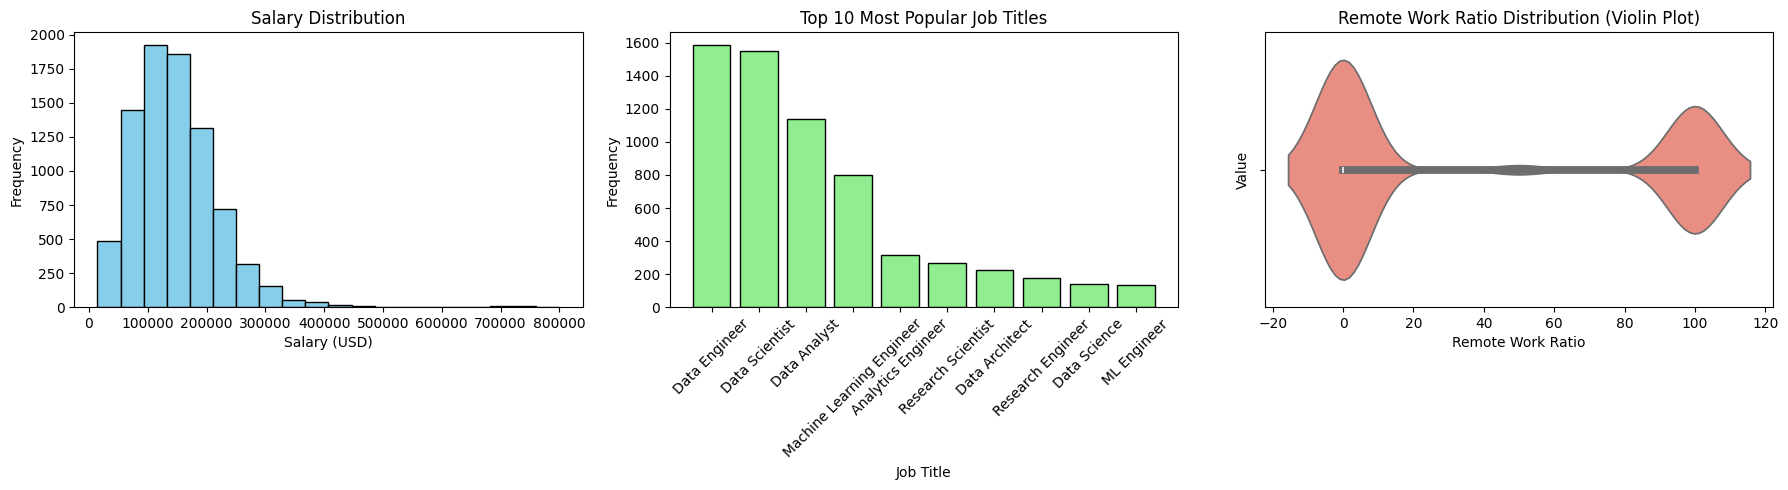

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for subplots
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

# Salary Distribution (Histogram)
axes[0].hist(df['Salary_in_USD'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Salary Distribution')
axes[0].set_xlabel('Salary (USD)')
axes[0].set_ylabel('Frequency')

# Job Title Distribution (Bar Plot)
job_title_counts = df['Job_Title'].value_counts().head(10)
axes[1].bar(job_title_counts.index, job_title_counts.values, color='lightgreen', edgecolor='black')
axes[1].set_title('Top 10 Most Popular Job Titles')
axes[1].set_xlabel('Job Title')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

# # not so clear
# # Remote Work Ratio Distribution (Histogram)
# axes[2].hist(df['Remote_Ratio'], bins=10, color='salmon', edgecolor='black')
# axes[2].set_title('Remote Work Ratio Distribution')
# axes[2].set_xlabel('Remote Work Ratio')
# axes[2].set_ylabel('Frequency')

# # good alternative
# # Remote Work Ratio Distribution (KDE Plot)
# sns.kdeplot(df['Remote_Ratio'], ax=axes[2], color='salmon', fill=True)
# axes[2].set_title('Remote Work Ratio Distribution')
# axes[2].set_xlabel('Remote Work Ratio')
# axes[2].set_ylabel('Probability Density')

# # Awful option
# # Remote Work Ratio Distribution (Box Plot)
# sns.boxplot(x=df['Remote_Ratio'], ax=axes[2], color='salmon')
# axes[2].set_title('Remote Work Ratio Distribution (Box Plot)')
# axes[2].set_xlabel('Remote Work Ratio')
# axes[2].set_ylabel('Value')

# # better option
# Remote Work Ratio Distribution (Violin Plot)
sns.violinplot(x=df['Remote_Ratio'], ax=axes[2], color='salmon')
axes[2].set_title('Remote Work Ratio Distribution (Violin Plot)')
axes[2].set_xlabel('Remote Work Ratio')
axes[2].set_ylabel('Value')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
